<a href="https://colab.research.google.com/github/Areeba-28Faisal/MachineLearning/blob/main/Predicting_Taxi_Fares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>








**Part 1: Predicting Taxi Fares**
The goal here is to build a neural network that minimizes loss on the following metrics:
MSE, MAE (Mean Absolute Arror) and MAPE (Mean Absolute Percentage Error).
Reference: https://www.tensorflow.org/api_docs/python/tf/keras/losses/

A. Create a baseline Neural network

B. Experiment with number of layers and neurons per layer to increase the
performance metrics.

C.Experiment with activation functions

D. Experiment with regularization techniques: Early stopping, Dropout rate




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import glob
import os
import cv2
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
from sklearn.linear_model import LogisticRegression

In [ ]:
import numpy as np
# Pandas is a kind of database tool used to load & manipulate data.
import pandas as pd

# Download the data using a .csv file link from -> https://github.com/ageron/handson-ml2
# Follow kaggle dataset -> https://www.kaggle.com/datasets/camnugent/california-train-prices
link = "https://raw.githubusercontent.com/gagan-iitb/CS550/main/Prog_Assignments/train_NYTaxi.csv"
train = pd.read_csv(link, nrows=100000)
train

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-04-08 19:11:10.0000004,4.9,2009-04-08 19:11:10 UTC,-73.998287,40.727490,-73.989854,40.735239,2
1,1,2012-07-30 16:19:08.0000003,4.9,2012-07-30 16:19:08 UTC,-73.966597,40.794345,-73.965682,40.803808,2
2,2,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00 UTC,-73.971638,40.763382,-73.953767,40.783715,1
3,3,2010-10-07 21:09:35.0000002,14.1,2010-10-07 21:09:35 UTC,-74.003545,40.707399,-73.981312,40.750071,1
4,4,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00 UTC,-74.004532,40.707465,-73.977908,40.745633,5
...,...,...,...,...,...,...,...,...,...
99995,99995,2015-06-08 07:05:28.0000003,4.5,2015-06-08 07:05:28 UTC,-73.965111,40.772343,-73.952072,40.768021,1
99996,99996,2012-09-17 15:09:00.000000161,25.5,2012-09-17 15:09:00 UTC,-73.786162,40.640710,-73.878865,40.658735,1
99997,99997,2013-02-02 19:02:00.00000047,14.5,2013-02-02 19:02:00 UTC,-73.982023,40.758052,-73.993930,40.734462,1
99998,99998,2013-12-28 15:44:17.0000004,9.0,2013-12-28 15:44:17 UTC,-73.956423,40.778140,-73.981008,40.779568,1


In [ ]:
train.describe()


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,11.333564,-72.448815,39.887315,-72.479259,39.890066,1.682150
std,28867.657797,9.810826,10.869743,6.383817,12.774264,6.260724,1.308617
min,0.000000,-9.300000,-736.516667,-74.015935,-2319.633333,-74.011085,0.000000
25%,24999.750000,6.000000,-73.992133,40.734793,-73.991443,40.734034,1.000000
50%,49999.500000,8.500000,-73.981850,40.752464,-73.980214,40.753093,1.000000
75%,74999.250000,12.500000,-73.967172,40.767032,-73.963718,40.768042,2.000000
max,99999.000000,394.000000,40.801777,404.666667,40.787037,44.640672,6.000000


In [ ]:
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])
train = train.drop(train[train['passenger_count']<=0].index, axis=0)
train = train.drop(train[train['passenger_count']>=7].index, axis=0)
train.dtypes

Unnamed: 0                         int64
key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [ ]:
train = train.drop(train[train['fare_amount']<=0].index, axis=0)
print("Shape of Train: ", train.shape)

Shape of Train:  (99625, 9)


In [ ]:
train=train.drop(['Unnamed: 0'],axis=1)
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,99625.000000,99625.000000,99625.000000,99625.000000,99625.000000,99625.000000
mean,11.342535,-72.446771,39.886106,-72.478086,39.889268,1.688381
std,9.821130,10.877680,6.389358,12.785593,6.264631,1.307039
min,0.010000,-736.516667,-74.015935,-2319.633333,-74.011085,1.000000
25%,6.000000,-73.992133,40.734777,-73.991443,40.734021,1.000000
50%,8.500000,-73.981852,40.752459,-73.980216,40.753082,1.000000
75%,12.500000,-73.967173,40.767025,-73.963723,40.768036,2.000000
max,394.000000,40.801777,404.666667,40.787037,44.640672,6.000000


In [ ]:
def select_outside_boundingbox(df, BB):
    filter_df = df.loc[(df['pickup_longitude'] < BB[0]) | (df['pickup_longitude'] > BB[1]) | \
           (df['pickup_latitude'] < BB[2]) | (df['pickup_latitude'] > BB[3]) | \
           (df['dropoff_longitude'] < BB[0]) | (df['dropoff_longitude'] > BB[1]) | \
           (df['dropoff_latitude'] < BB[2]) | (df['dropoff_latitude'] > BB[3])]
    return filter_df

NYC_BB = (-74.5, -72.8, 40.5, 41.8)
train_outliers = select_outside_boundingbox(train, NYC_BB)
train_outliers


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
19,2009-11-13 15:52:00.000000780,7.3,2009-11-13 15:52:00+00:00,0.00000,0.000000,0.000000,0.000000,1
32,2009-12-10 00:55:00.000000320,17.3,2009-12-10 00:55:00+00:00,0.00000,0.000000,0.000000,0.000000,1
38,2013-04-28 01:19:56.000000100,22.5,2013-04-28 01:19:56+00:00,0.00000,0.000000,0.000000,0.000000,4
39,2011-07-10 20:07:56.000000500,32.1,2011-07-10 20:07:56+00:00,0.00000,0.000000,0.000000,0.000000,2
103,2014-04-29 11:36:00.000000260,12.0,2014-04-29 11:36:00+00:00,0.00000,0.000000,0.000000,0.000000,5
...,...,...,...,...,...,...,...,...
99775,2009-09-06 12:24:00.000000590,7.4,2009-09-06 12:24:00+00:00,-71.06153,42.364088,-71.076242,42.367063,1
99885,2014-06-12 13:04:45.000000700,23.5,2014-06-12 13:04:45+00:00,0.00000,0.000000,0.000000,0.000000,2
99929,2010-06-22 10:41:05.000000300,3.7,2010-06-22 10:41:05+00:00,0.00000,0.000000,0.000000,0.000000,1
99955,2014-05-25 00:02:00.000000880,3.0,2014-05-25 00:02:00+00:00,0.00000,0.000000,0.000000,0.000000,1


In [ ]:
# Remove the outliers from the train dataframe
train = train.drop(train_outliers.index, axis=0)

In [ ]:
data = [train]

for i in data:
    i["hour"] = i.pickup_datetime.dt.hour
    i["day_of_week"] = i.pickup_datetime.dt.weekday
    i["day_of_month"] = i.pickup_datetime.dt.day
    i["week"] = i.pickup_datetime.dt.isocalendar().week
    i["month"] = i.pickup_datetime.dt.month
    i["year"] = i.pickup_datetime.dt.year
# Remove the pickup_datetime column since it's no longer needed
train = train.drop(['pickup_datetime'], axis=1)
train = train.drop(['key'], axis=1)


In [ ]:
train['week'].describe()

count    97454.000000
mean        25.458698
std         14.940423
min          1.000000
25%         13.000000
50%         24.000000
75%         39.000000
max         53.000000
Name: week, dtype: float64

In [ ]:
def haversine_distance(lat1, long1, lat2, long2):
    data=[train]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])

        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])

        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2

        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d
#haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')


In [ ]:
havers=haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
havers
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,day_of_month,week,month,year,H_Distance
count,97454.000000,97454.000000,97454.000000,97454.000000,97454.000000,97454.000000,97454.000000,97454.000000,97454.000000,97454.000000,97454.000000,97454.000000,97454.000000
mean,11.327454,-73.975117,40.751083,-73.974409,40.751454,1.687391,13.516059,3.029747,15.684651,25.458698,6.268096,2011.737363,3.331275
std,9.746688,0.039383,0.030014,0.038036,0.033050,1.305450,6.512290,1.950057,8.691222,14.940423,3.435422,1.865108,3.804709
min,0.010000,-74.478387,40.504195,-74.478387,40.505522,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992353,40.736398,-73.991646,40.735617,1.000000,9.000000,1.000000,8.000000,13.000000,3.000000,2010.000000,1.258019
50%,8.500000,-73.982133,40.753204,-73.980688,40.753842,1.000000,14.000000,3.000000,16.000000,24.000000,6.000000,2012.000000,2.150080
75%,12.500000,-73.968445,40.767478,-73.965488,40.768385,2.000000,19.000000,5.000000,23.000000,39.000000,9.000000,2013.000000,3.926122
max,394.000000,-73.044891,41.366138,-73.044891,41.524688,6.000000,23.000000,6.000000,31.000000,53.000000,12.000000,2015.000000,103.645956


In [ ]:
axes=["hour","month","day_of_week","week",'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude','H_Distance']
for x in train[axes]:
    q75,q25 = np.percentile(train.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    train.loc[train[x] < min,x] = np.nan
    train.loc[train[x] > max,x] = np.nan

In [ ]:
train.isnull().sum()
train=train.dropna()

print(train.describe(),train.shape)

        fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  84598.000000      84598.000000     84598.000000       84598.000000   
mean       8.888880        -73.981954        40.752634         -73.980892   
std        4.675617          0.016102         0.021316           0.016998   
min        0.010000        -74.028080        40.689787         -74.029840   
25%        5.700000        -73.992888        40.738010         -73.992317   
50%        7.700000        -73.982942        40.753328         -73.982136   
75%       10.900000        -73.971574        40.766464         -73.970301   
max      155.330000        -73.932602        40.814060         -73.926254   

       dropoff_latitude  passenger_count          hour   day_of_week  \
count      84598.000000     84598.000000  84598.000000  84598.000000   
mean          40.752809         1.683574     13.659212      3.013948   
std            0.022678         1.303576      6.367950      1.940988   
min           40.6

In [ ]:
# Lets filter the rows where both distance and fare are available
filtered = train[(train['H_Distance'] > 0) & (train['fare_amount'] > 0)]
# We need a column with fare_amount / H_Distance
Average_Fare_Per_Km = (filtered['fare_amount'] / filtered['H_Distance']).mean()


In [ ]:
Average_Fare_Per_Km

38.63224474462533

In [ ]:
train = train.drop(train[train['H_Distance']<=0].index, axis=0)
print("Shape of Train: ", train.shape)
train.describe()

Shape of Train:  (83859, 13)


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,day_of_month,week,month,year,H_Distance
count,83859.000000,83859.000000,83859.000000,83859.000000,83859.000000,83859.000000,83859.000000,83859.000000,83859.000000,83859.000000,83859.000000,83859.000000,83859.000000
mean,8.883685,-73.981990,40.752632,-73.980918,40.752809,1.683302,13.657759,3.013225,15.670614,25.412323,6.257849,2011.730703,2.376091
std,4.556500,0.016063,0.021310,0.016970,0.022684,1.303074,6.367866,1.941273,8.698303,14.946641,3.437152,1.866561,1.570354
min,0.010000,-74.028080,40.689787,-74.029840,40.686500,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2009.000000,0.000084
25%,5.700000,-73.992898,40.737992,-73.992322,40.737991,1.000000,9.000000,1.000000,8.000000,13.000000,3.000000,2010.000000,1.203384
50%,7.700000,-73.982958,40.753325,-73.982143,40.754048,1.000000,14.000000,3.000000,16.000000,24.000000,6.000000,2012.000000,1.945722
75%,10.900000,-73.971626,40.766472,-73.970347,40.767353,2.000000,19.000000,5.000000,23.000000,39.000000,9.000000,2013.000000,3.161339
max,100.330000,-73.932602,40.814060,-73.926254,40.817510,6.000000,23.000000,6.000000,31.000000,53.000000,12.000000,2015.000000,7.926335


In [ ]:
abs(train.corr()['fare_amount']).sort_values(ascending=False)

fare_amount          1.000000
H_Distance           0.717539
year                 0.156967
dropoff_latitude     0.109336
pickup_latitude      0.072489
pickup_longitude     0.048880
month                0.033294
week                 0.032991
passenger_count      0.011580
day_of_week          0.011067
dropoff_longitude    0.006040
hour                 0.005684
day_of_month         0.003477
Name: fare_amount, dtype: float64

Now the data has been cleaned and is ready for processing with neural networks. We have removed outliers as well as negative values from the dataset.

All the extra columns which do not have a lot of effect have also been dropped.

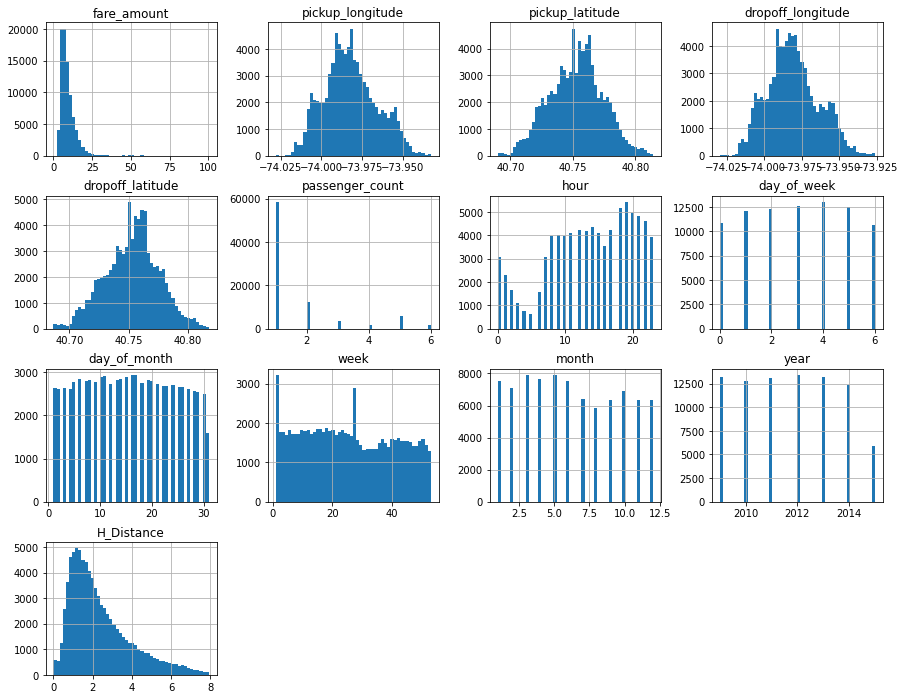

In [ ]:
from matplotlib import pyplot as plt

# DataFrame.hist() creates histogram of every feature present in the DataFrame.
train.hist(bins=50, figsize=(15,12))
plt.show()

In [ ]:
train['fare_amount'].describe()

count    83859.000000
mean         8.883685
std          4.556500
min          0.010000
25%          5.700000
50%          7.700000
75%         10.900000
max        100.330000
Name: fare_amount, dtype: float64

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from collections import Counter
from torchvision import datasets
import os
import cv2
#tranform compse to tensor

In [ ]:
#test = pd.read_csv("/content/test.csv")
#check for missing values in test data
#test.isnull().sum().sort_values(ascending=False)
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
X=train.drop(['fare_amount'],axis=1)
y=train['fare_amount']
######
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
scaler_x = scaler.fit_transform(X)
print(scaler_x)
#####
x_train,x_test,y_train,y_test=train_test_split(scaler_x,y,test_size=0.25,random_state=42)

[[-1.014608   -1.17979574 -0.52656977 ... -0.65689938 -1.462968
  -0.8018882 ]
 [ 0.95830368  1.95743681  0.89782631 ...  0.21592148  0.14427542
  -0.84124087]
 [ 0.64446815  0.50446947  1.59994774 ... -1.23877995 -0.39147239
   0.2164289 ]
 ...
 [-0.00206664  0.2543543  -0.76675835 ... -1.23877995  0.68002323
   0.27525426]
 [ 1.59170233  1.19700224 -0.0052969  ...  1.67062292  0.68002323
  -0.19099793]
 [-0.47160593  0.28743708 -0.53470177 ... -0.65689938  1.21577104
   0.28347535]]


In [ ]:
X.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,day_of_month,week,month,year,H_Distance
count,83859.000000,83859.000000,83859.000000,83859.000000,83859.000000,83859.000000,83859.000000,83859.000000,83859.000000,83859.000000,83859.000000,83859.000000
mean,-73.981990,40.752632,-73.980918,40.752809,1.683302,13.657759,3.013225,15.670614,25.412323,6.257849,2011.730703,2.376091
std,0.016063,0.021310,0.016970,0.022684,1.303074,6.367866,1.941273,8.698303,14.946641,3.437152,1.866561,1.570354
min,-74.028080,40.689787,-74.029840,40.686500,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2009.000000,0.000084
25%,-73.992898,40.737992,-73.992322,40.737991,1.000000,9.000000,1.000000,8.000000,13.000000,3.000000,2010.000000,1.203384
50%,-73.982958,40.753325,-73.982143,40.754048,1.000000,14.000000,3.000000,16.000000,24.000000,6.000000,2012.000000,1.945722
75%,-73.971626,40.766472,-73.970347,40.767353,2.000000,19.000000,5.000000,23.000000,39.000000,9.000000,2013.000000,3.161339
max,-73.932602,40.814060,-73.926254,40.817510,6.000000,23.000000,6.000000,31.000000,53.000000,12.000000,2015.000000,7.926335


In [ ]:
x_train

array([[-0.23733434,  0.48795155, -1.29846139, ...,  1.08874235,
         0.68002323,  1.42964087],
       [-1.14553363, -1.19809685,  0.11998301, ...,  0.50686177,
         0.68002323, -0.24470095],
       [-0.45666434,  0.25083486,  0.56842146, ...,  0.79780206,
         1.21577104, -0.54124817],
       ...,
       [ 0.94130763,  0.53431436,  0.15233422, ...,  0.21592148,
         0.14427542, -0.70790507],
       [-1.11552595, -1.04497757, -0.77530284, ..., -0.65689938,
         0.14427542, -0.89105019],
       [ 0.99497282,  0.58780991,  0.47384278, ..., -1.52972024,
         0.68002323, -0.73767479]])

In [ ]:
x_test

array([[ 0.97393008,  0.71666849,  0.28126764, ...,  0.79780206,
         0.14427542, -0.36117525],
       [ 0.26040718,  1.61253128,  0.26730182, ...,  0.79780206,
        -1.462968  , -0.9425521 ],
       [ 0.39643786, -0.14320211,  0.14190405, ..., -1.23877995,
         0.68002323, -0.77220579],
       ...,
       [ 2.3153108 ,  2.86568805,  1.90442625, ...,  1.67062292,
        -0.39147239, -0.91778854],
       [-0.79384609,  0.35219485,  0.50477973, ..., -0.36595909,
        -0.92722019,  0.7146721 ],
       [-0.75207191, -0.07079541,  2.03718996, ...,  0.79780206,
         0.14427542,  2.97335945]])

In [ ]:
y_train

49108    17.0
4987      7.5
3479      7.0
91377     4.9
50090     5.3
         ... 
7463     13.7
65553    10.1
91566     8.1
1024      4.5
18843     5.0
Name: fare_amount, Length: 62894, dtype: float64

In [ ]:
x_train = tf.constant(x_train)
y_train = tf.constant(y_train)
x_test = tf.convert_to_tensor(x_test)
x_test = tf.constant(x_test)
y_test = tf.constant(y_test)

In [ ]:
from tensorflow import keras
from keras import models
from keras import layers
# first neural network with keras tutorial
from numpy import loadtxt


In [ ]:
tf.random.set_seed(42)
...
# define the keras model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16,  activation='sigmoid'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(8, activation='sigmoid'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(1))

In [ ]:
#from tf.keras.metrics.mean_absolute_error
# compile the keras model
#model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01),
                        metrics = ["mse","mae","mape",])

Now We try to run the network with different epoch size and batch size to see what are the changes in the learning method.

In [ ]:
Batch=128
Run =model.fit( x_train,y_train,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // Batch,
    batch_size=128, epochs=150, verbose=0)

In [ ]:
predicted_y=model.predict(x_test)

In [ ]:
res = model.evaluate(x_test, y_test, verbose=1)
res

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [ ]:
print("mean squared error: ",mean_squared_error(predicted_y,y_test))
print("mean absolute error: ",mean_absolute_error(predicted_y,y_test))
print("mean absolute percentage error: ",mean_absolute_percentage_error(predicted_y,y_test))

In [ ]:
metrics_model=[mean_absolute_percentage_error(y_test,predicted_y),mean_absolute_error(y_test,predicted_y),mean_squared_error(y_test,predicted_y)]
metrics_model

In [ ]:

# Visualize training history
import matplotlib.pyplot as plt
import numpy as np

model.summary()

In [ ]:
print(Run.history.keys())

In [ ]:
pd.DataFrame(Run.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
plt.plot(Run.history['loss'])
plt.plot(Run.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

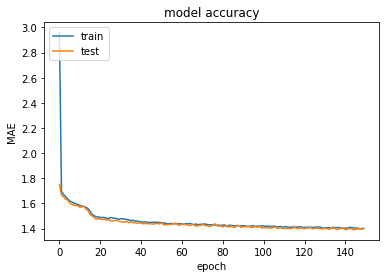

In [ ]:
plt.plot(Run.history['mae'])
plt.plot(Run.history['val_mae'])
plt.title('model accuracy')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

this graph shows that the mape decreases with the number of epochs.  If these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch.

in this case we can see a small difference in the mape values for test and train data.

both loss and other metrics decrease consistently with epochs.

#Experiment with number of layers and neurons per layer
 This is done to increase the performance metrics

 We can summarize the types of layers as follows:

**Input Layer**: Input variables, sometimes called the visible layer.

**Hidden Layers**: Layers of nodes between the input and output layers. There may be one or more of these layers.

**Output Layer:** A layer of nodes that produce the output variables.


Finally, there are terms used to describe ***the shape and capability of a neural network:***

* Size: The number of nodes in the model.

* Width: The number of nodes in a specific layer.

* Depth: The number of layers in a neural network.

* Capacity: The type or structure of functions that can be learned by a network configuration. Sometimes called “representational capacity“.

* Architecture: The specific arrangement of the layers and nodes in the network.


In [ ]:
import keras.backend as K
from keras.layers import Dense,Dropout
from tensorflow import keras

In [ ]:
n_col = train.shape[1]
print(n_col)

from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU



def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

def model1() :   #Created a Model using Keras
    model1 = tf.keras.models.Sequential()
    model1.add(tf.keras.layers.Dense(128,activation='sigmoid')) #256 neurons in hidden layer
    model1.add(BatchNormalization())
    model1.add(tf.keras.layers.Dense(64,activation='sigmoid'))  # 128 neurons in hidden layer
    model1.add(BatchNormalization())
    model1.add(tf.keras.layers.Dense(16,activation='sigmoid')) # 16 neurons in hidden layer
    model1.add(BatchNormalization())
    model1.add(tf.keras.layers.Dense(8,activation='sigmoid')) # 8 neurons in hidden layer
    model1.add(BatchNormalization())
    model1.add(tf.keras.layers.Dense(1)) # 1 neuron in output layer

    #nadam = optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
    #adadelta =optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
    #adgrad = optimizers.Adagrad(lr=0.001, epsilon=None, decay=0.0)
    #rms = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

    #sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True,clipnorm=0.5)

    model1.compile(optimizer='adam',loss='mse', metrics=[rmse])
    return model1

Batch=128
model1 = model1()
estimator = model1.fit(x_train,y_train, batch_size=128, epochs=100,
                    verbose=1, validation_data=(x_test,y_test),
                    validation_steps=len(x_test) // Batch,)

13
Epoch 1/100
492/492 [==============================] - 4s 5ms/step - loss: 61.0726 - rmse: 7.0567 - val_loss: 24.7555 - val_rmse: 3.8621
Epoch 2/100
492/492 [==============================] - 2s 5ms/step - loss: 13.4985 - rmse: 2.3201 - val_loss: 9.6684 - val_rmse: 1.6093
Epoch 3/100
492/492 [==============================] - 2s 5ms/step - loss: 8.5399 - rmse: 1.5921 - val_loss: 9.1027 - val_rmse: 1.5279
Epoch 4/100
492/492 [==============================] - 3s 5ms/step - loss: 8.1781 - rmse: 1.5351 - val_loss: 8.8631 - val_rmse: 1.4768
Epoch 5/100
492/492 [==============================] - 2s 5ms/step - loss: 8.0654 - rmse: 1.5094 - val_loss: 8.8279 - val_rmse: 1.4790
Epoch 6/100
492/492 [==============================] - 2s 5ms/step - loss: 7.9613 - rmse: 1.4970 - val_loss: 8.7120 - val_rmse: 1.4300
Epoch 7/100
492/492 [==============================] - 2s 5ms/step - loss: 7.9490 - rmse: 1.4875 - val_loss: 8.7216 - val_rmse: 1.4560
Epoch 8/100
492/492 [============================

to expeiment wiyh different models we create a functions

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
 model_s = keras.models.Sequential()
 options = {"input_shape": input_shape}
 for layer in range(n_hidden):
   model_s.add(keras.layers.Dense(n_neurons, activation="relu", **options))
   options = {}
 model.add(keras.layers.Dense(1, **options))
 optimizer = keras.optimizers.SGD(learning_rate)
 model.compile(loss="mse", optimizer=optimizer)
 return model


In [ ]:
%%time
def fit_model(model,epoch=100):
  Batch=128
  history=model.fit( x_train,y_train,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // Batch,
    batch_size=128, epochs=epoch, verbose=1)
  return history

In [ ]:
import scipy.stats as st

def table(data):
  value=st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))
  return value

In [ ]:
def metric_model(model,x_test,y_test):
  eva=model.evaluate(x_test,y_test)
  pred1=model.predict(x_test)
  metrics=[mean_absolute_percentage_error(y_test,pred1),mean_absolute_error(y_test,pred1),mean_squared_error(y_test,pred1)]
  print('the evaluation is',eva,'\n\n the prediction is ',pred1,'\n\n the metrics are',metrics,'\n')
  return



In [ ]:
fit1=fit_model(model1)

In [ ]:
metric1= metric_model(model1,x_test,y_test)

In [ ]:
table1=table(history)
table1

In [ ]:
model_2= tf.keras.Sequential([
                       tf.keras.layers.Dense(32, activation='sigmoid', ),
                       tf.keras.layers.BatchNormalization(),
                       tf.keras.layers.Dense(32, activation='sigmoid'),
                       tf.keras.layers.BatchNormalization(),
                       tf.keras.layers.Dense(16, activation='sigmoid'),
                       tf.keras.layers.BatchNormalization(),
                       tf.keras.layers.Dense(8, activation='sigmoid'),
                       tf.keras.layers.BatchNormalization(),

                      tf.keras.layers.Dense(1)
])

model_2.compile(loss='mae',
            optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01),
             metrics=['mae','mse','mape'])

In [ ]:
fit2=fit_model(model_2,50)

In [ ]:
metric2=metric_model(model_2,x_test,y_test)

In [ ]:
model_3= tf.keras.Sequential([
                       tf.keras.layers.Dense(32, activation='relu', input_dim=x_train.shape[1]),
                       tf.keras.layers.BatchNormalization(),
                       tf.keras.layers.Dense(16, activation='relu'),
                       tf.keras.layers.BatchNormalization(),
                       tf.keras.layers.Dense(8, activation='relu'),
                       tf.keras.layers.BatchNormalization(),

                      tf.keras.layers.Dense(1)
])

model_3.compile(loss='mae',
            optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01),
             metrics=['mae','mse','mape'])

In [ ]:
fit3= fit_model(model_3, 128)

In [ ]:
metric3= metric_model(model_3,x_test,y_test)

In [ ]:
from sklearn.metrics import mean_squared_error
model_4= tf.keras.Sequential([
                       tf.keras.layers.Dense(32, activation='relu'),
                       tf.keras.layers.BatchNormalization(),
                       tf.keras.layers.Dense(16, activation='softmax'),
                       tf.keras.layers.BatchNormalization(),
                       tf.keras.layers.Dense(16, activation='relu'),
                       tf.keras.layers.BatchNormalization(),
                       tf.keras.layers.Dense(8, activation='softmax'),
                       tf.keras.layers.BatchNormalization(),

                      tf.keras.layers.Dense(1)
])

model_4.compile(loss='mae',
            optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
             metrics=['mae','mse','mape'])

In [ ]:
fit4= fit_model(model_4,60)

In [ ]:
metric4= metric_model(model_4,x_test,y_test)

656/656 [==============================] - 1s 2ms/step - loss: 1.3292 - mae: 1.3292 - mse: 8.7571 - mape: 13.9190
the evaluation is [1.3291953802108765, 1.3291953802108765, 8.757068634033203, 13.919032096862793] 

 the prediction is  [[ 8.445759 ]
 [ 4.4364586]
 [ 7.3662624]
 ...
 [ 4.8898115]
 [ 8.318588 ]
 [15.171545 ]] 

 the metrics are [0.13919032221992222, 1.3291952354209167, 8.757070123318599] 



In [ ]:
table4=table(model_4)
table4

In [ ]:
model_5= tf.keras.Sequential([
                       tf.keras.layers.Dense(64, activation='relu'),
                       tf.keras.layers.BatchNormalization(),
                       tf.keras.layers.Dense(32, activation='relu'),
                       tf.keras.layers.BatchNormalization(),
                       tf.keras.layers.Dense(8, activation='relu'),
                       tf.keras.layers.BatchNormalization(),

                      tf.keras.layers.Dense(1)

])

model_5.compile(loss='mae',
            optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
             metrics=['mae','mse','mape'])

In [ ]:
fit5=fit_model(model_5,100)

In [ ]:
metric5=metric_model(model_5,x_test,y_test)

In [ ]:
table5=table(history)
table5

In [ ]:
model_6= tf.keras.Sequential([
                       tf.keras.layers.Dense(64, activation='softmax'),
                       tf.keras.layers.BatchNormalization(),
                       tf.keras.layers.Dense(32, activation='softmax'),
                       tf.keras.layers.BatchNormalization(),
                       tf.keras.layers.Dense(8, activation='softmax'),
                       tf.keras.layers.BatchNormalization(),

                      tf.keras.layers.Dense(1)

])

model_6.compile(loss='mae',
            optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
             metrics=['mae','mse','mape'])

In [ ]:
fit6=fit_model (model_6,10)

In [ ]:
metric6=metric_model(model_6,x_test,y_test)

In [ ]:
table6=table(history)
table6

# Experimening with Early Stopping and Dropout



In [ ]:
cb= tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)

In [ ]:
# define a deep neural network model


model_7= tf.keras.Sequential([
                    tf.keras.layers.Dense(32, activation='sigmoid'),
                    tf.keras.layers.BatchNormalization(),
                    tf.keras.layers.Dense(16, activation='sigmoid'),
                    tf.keras.layers.BatchNormalization(),

                    tf.keras.layers.Dense(1)
])

model_7.compile(loss='mae',
            optimizer=tf.keras.optimizers.Adam(0.001),metrics=['mae','mse','mape'])

In [ ]:
%%time
Batch =128
Run =model_7.fit( x_train,y_train,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // Batch,
    batch_size=128,epochs=50, verbose=1,callbacks=[cb])

In [ ]:
metric_7=metric_model(model_7,x_test, y_test)

conclusions:
* from the above models, we can determine that the number of layers has a quicker effect as compared to number of neurons on the accuracy and score of the neural network.
* we can also see that for similar number of neurons and layers, the activation function also has a huge effect on the results.
the sigmoid activation function is not as good as Relu in some aspects.


---
**DROP OUT RATE**


---



In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dropout

In [ ]:
model_8 = tf.keras.Sequential([

                     tf.keras.layers.Dense(32, activation='relu'),
                     tf.keras.layers.BatchNormalization(),
                     Dropout(0.3)  ,
                  tf.keras.layers.Dense(16, activation='relu'),
                  tf.keras.layers.BatchNormalization(),
                  Dropout(0.2),
                tf.keras.layers.Dense(8, activation='relu'),
                tf.keras.layers.BatchNormalization(),
                Dropout(0.3),

             tf.keras.layers.Dense(1)
])

model_8.compile(loss='mae',
          optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01),
           metrics=['mae','mse','mape'])

In [ ]:
%%time
Batch =128
Run =model_8.fit( x_train, y_train,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // Batch,
    batch_size=128,
    epochs=10, verbose=1)

Epoch 1/10
492/492 [==============================] - 2s 3ms/step - loss: 1.8858 - mae: 1.8858 - mse: 11.1877 - mape: 21.0937 - val_loss: 1.5743 - val_mae: 1.5743 - val_mse: 10.0205 - val_mape: 16.5393
Epoch 2/10
492/492 [==============================] - 2s 4ms/step - loss: 1.8774 - mae: 1.8774 - mse: 11.0809 - mape: 21.1286 - val_loss: 1.5758 - val_mae: 1.5758 - val_mse: 9.9869 - val_mape: 16.6973
Epoch 3/10
492/492 [==============================] - 2s 4ms/step - loss: 1.8552 - mae: 1.8552 - mse: 11.0115 - mape: 20.8426 - val_loss: 1.5777 - val_mae: 1.5777 - val_mse: 10.0222 - val_mape: 16.6777
Epoch 4/10
492/492 [==============================] - 1s 3ms/step - loss: 1.8457 - mae: 1.8457 - mse: 10.8784 - mape: 20.6965 - val_loss: 1.5664 - val_mae: 1.5664 - val_mse: 9.9135 - val_mape: 16.6407
Epoch 5/10
492/492 [==============================] - 1s 3ms/step - loss: 1.8411 - mae: 1.8411 - mse: 10.8853 - mape: 20.6841 - val_loss: 1.5678 - val_mae: 1.5678 - val_mse: 9.9653 - val_mape: 1

In [ ]:
table8=table(Run)
table8

In [ ]:
metric_8=metric_model(model_8,x_test,y_test)

In [ ]:
input = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)
model_ = keras.models.Model(inputs=[input], outputs=[output])


In [ ]:
model_.compile(loss="mse", optimizer="sgd")

history = model_.fit( x_train, y_train,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // Batch,
    batch_size=128,
    epochs=10, verbose=1)



In [ ]:
metric_=metric_model(model_,x_test,y_test)

#Trying with other optimisers

In [ ]:
import tensorflow
from tensorflow import keras
from keras import layers
from keras.layers import Dropout
from keras import optimizers
optimizers.RMSprop
optimizers.Adam

In [ ]:
model_9= tf.keras.Sequential([

                         tf.keras.layers.Dense(32, activation='relu'),
                         tf.keras.layers.BatchNormalization(),
                          Dropout(0.3) ,
                      tf.keras.layers.Dense(8, activation='softmax'),
                       tf.keras.layers.BatchNormalization(),
                      Dropout(0.3) ,

                     tf.keras.layers.Dense(1)
])
rms=keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model_9.compile(loss='mae',
            optimizer=rms, metrics=['mae','mse','mape'])

In [ ]:

%%time
Batch =128
Run =model_9.fit(x_train,y_train,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // Batch,
    batch_size=128,
    epochs=100, verbose=1)

NameError: ignored

In [ ]:
table9=table(Run)
table9

In [ ]:
metric_9=metric_model(model_9,x_test,y_test)

NameError: ignored

In [ ]:
model_10= tf.keras.Sequential([

                         tf.keras.layers.Dense(32, activation='relu'),
                         tf.keras.layers.BatchNormalization(),
                      tf.keras.layers.Dense(8, activation='sigmoid'),
                       tf.keras.layers.BatchNormalization(),
                      Dropout(0.3) ,

                     tf.keras.layers.Dense(1)
])

adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)


model_10.compile(loss='mae',
            optimizer=adam, metrics=['mae','mse','mape'])

In [ ]:

%%time
Batch =128
Run =model_10.fit(x_train,y_train,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // Batch,
    batch_size=128,
    epochs=100, verbose=1)

In [ ]:
metric_10=metric_model(model_10,x_test,y_test)

from the above experiments we can observe that wide and deep models give better results due to conactenation. also the activation technique best suited has been relu. I would like to use Adam as the optimizer on the above metrics.

the number of epochs and the batch size also determines the quality of the neural network. Generally , more number of epochs are better but may lead to overfitting of data.

we have used a function to show the 95% confidence levels of some of the above models.